#Step 3
Optimization with uncertain conversion rates

In [1]:
import numpy as np
import matplotlib.pyplot as plt


import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.Environment import Environment
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.TSLearner import TSLearner
from Code.NoisyClairvoyant import  NoisyClairvoyant

%matplotlib inline

In [2]:
cust_json = "customer_classes.json"
today_customer = 100
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph.json"

arms = settings.prices
environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)
clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm.values())

loading: [==============================] 99.6%
 [0, 2, 0, 0, 0] 1007.0323232240004 10.070323232240003 dict_values([800.6861604640001, 783.3149679950001, 733.3645491840002, 677.5962822690001, 792.8479840500002, 775.9507886150002, 727.5197616400001, 673.3476142450002, 791.2851488399999, 774.5821365180001, 727.0838446440001, 673.844840374, 791.83584501, 775.3857530820002, 728.4233757210002, 675.788693601, 788.0990730400001, 770.8608524250001, 720.9714159600002, 665.4382223350002, 780.5143841500002, 763.7254819250002, 715.3250366, 661.336411375, 778.8229313200001, 762.2225125300001, 714.7410796600001, 661.6610623700001, 779.35772323, 762.9965974699999, 716.0401669150002, 663.5432191550001, 772.6500944040001, 755.5478339625, 705.9851183210001, 650.7771634485001, 765.3320545650001, 748.6629421125, 700.5415467250001, 646.8224269725001, 763.6370559320002, 747.1531408029999, 699.922922306, 647.0817928270002, 764.1782775730002, 747.9246490945002, 701.2035915340001, 648.9240666055001, 747.031656

In [18]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

customer = Customer(feature1, feature2)

TIME_HORIZON = 300
NUM_ITERATION = 1

In [4]:
aggregate_customer = Customer(
    0,
    0,
    environment.get_aggregate_alphas(),
    environment.get_aggregate_num_prods_distribution(),
    environment.get_aggregate_click_graph()
)


In [5]:
clairvoyant_rewards_iterations = []
for i in range(NUM_ITERATION):
    clairvoyant_learner = NoisyClairvoyant(n_arms, n_products, environment.customers, graph_json, arms, environment.customers_distribution, environment._get_aggregate_buy())
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        clairvoyant_super_arm = clairvoyant_learner.select_superarm()
        print(clairvoyant_super_arm)
        report = environment.round(clairvoyant_super_arm)
        clairvoyant_learner.update(clairvoyant_super_arm.copy(), report)
    clairvoyant_rewards = clairvoyant_learner.history_rewards
    clairvoyant_rewards_iterations.append(np.array(clairvoyant_rewards))
clairvoyant_rewards_iterations = np.array(clairvoyant_rewards_iterations)
clairvoyant_rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
loading: [===                           ] 10.0%[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
loading: [======                        ] 20.0%[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
loading: [=========                     ] 30.0%[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
loading: [============                  ] 40.0%[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 0, 0]


Process ForkPoolWorker-628:
Process ForkPoolWorker-626:
Process ForkPoolWorker-627:
Process ForkPoolWorker-631:
Process ForkPoolWorker-625:
Process ForkPoolWorker-629:
Process ForkPoolWorker-632:
Process ForkPoolWorker-630:


KeyboardInterrupt: 

In [6]:
plt.figure(figsize=(10, 5))
mean = np.mean(clairvoyant_rewards_iterations, axis=0)
stdev = np.std(clairvoyant_rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(clairvoyant_rewards))], [clairvoyant_reward for _ in range(len(clairvoyant_rewards))])
plt.show()

/home/tpoppo/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/tpoppo/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/tpoppo/.local/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/tpoppo/.local/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/tpoppo/.local/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


TypeError: object of type 'numpy.float64' has no len()

<Figure size 720x360 with 0 Axes>

UCB

In [19]:
ucb_rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb1_learner = UCBLearner(n_arms, n_products, environment.customers, graph_json, arms, environment.customers_distribution)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        ucb_super_arm = ucb1_learner.select_superarm()
        print(ucb_super_arm)
        report = environment.round(ucb_super_arm)
        ucb1_learner.update(ucb_super_arm.copy(), report)
    ucb_rewards = ucb1_learner.history_rewards
    ucb_rewards_iterations.append(np.array(ucb_rewards))
ucb_rewards_iterations = np.array(ucb_rewards_iterations)
ucb_rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%[3, 3, 3, 3, 3]
[3, 2, 2, 3, 2]
[2, 2, 3, 3, 2]
[3, 3, 1, 3, 1]
[2, 2, 2, 2, 1]
[1, 3, 1, 2, 2]
[3, 2, 3, 2, 3]
[1, 2, 1, 2, 1]
[2, 3, 1, 3, 0]
[3, 1, 1, 3, 0]
loading: [=                             ] 3.3%[1, 2, 1, 2, 2]
[2, 2, 2, 2, 0]
[3, 3, 2, 2, 0]
[3, 1, 3, 3, 3]
[2, 2, 1, 3, 0]
[0, 2, 2, 3, 1]
[3, 3, 1, 3, 0]
[3, 1, 2, 3, 0]
[1, 2, 1, 3, 1]
[0, 2, 0, 2, 1]
loading: [==                            ] 6.7%[0, 3, 0, 2, 2]
[3, 2, 0, 1, 1]
[0, 1, 3, 1, 3]
[3, 2, 0, 1, 0]
[0, 3, 0, 1, 1]
[0, 2, 2, 1, 2]
[2, 2, 0, 2, 0]
[3, 2, 0, 2, 0]
[0, 3, 0, 3, 0]
[0, 2, 0, 1, 0]
loading: [===                           ] 10.0%[3, 2, 0, 2, 1]
[3, 2, 0, 2, 0]
[3, 2, 0, 2, 3]
[3, 2, 0, 2, 1]
[0, 2, 1, 2, 1]
[3, 1, 2, 3, 0]
[2, 1, 1, 3, 0]
[0, 3, 0, 1, 2]
[1, 2, 1, 3, 0]
[2, 2, 0, 2, 0]
loading: [====                          ] 13.3%[1, 2, 0, 1, 1]
[0, 1, 3, 2, 2]
[3, 2, 0, 3, 0]
[3, 2, 0, 2, 1]
[2, 3, 0, 2, 0]
[0, 2, 2, 3, 0]
[0, 2, 1, 2, 1]
[2

(1, 300)

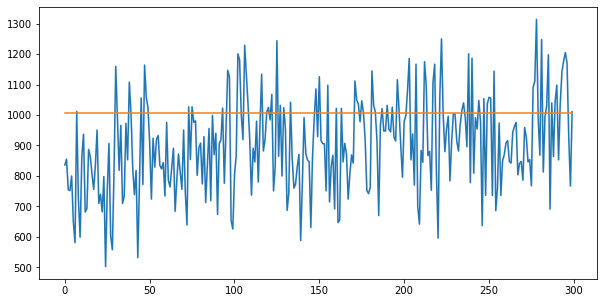

In [20]:
plt.figure(figsize=(10, 5))
mean = np.mean(ucb_rewards_iterations, axis=0)
stdev = np.std(ucb_rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(ucb_rewards))], [clairvoyant_reward for _ in range(len(ucb_rewards))])
plt.show()

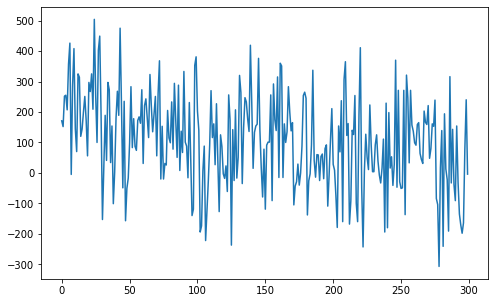

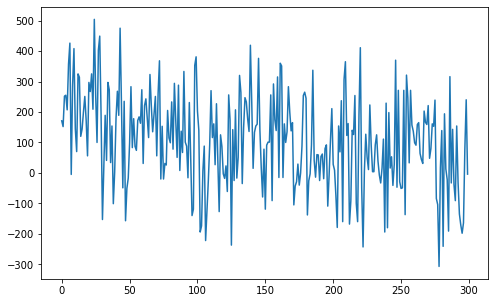

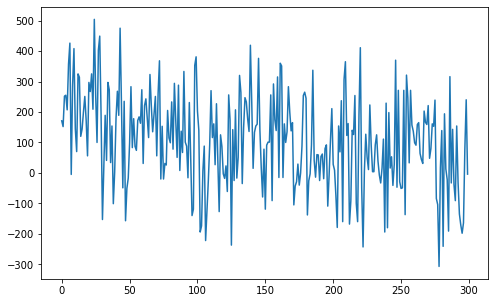

In [23]:
plt.figure(figsize=(8,5))
ucb_regret = clairvoyant_reward - ucb_rewards_iterations 
ucb_mean_regret = np.mean(ucb_regret, axis=0)

plt.plot(range(len(ucb_mean_regret)), ucb_mean_regret)
plt.show()

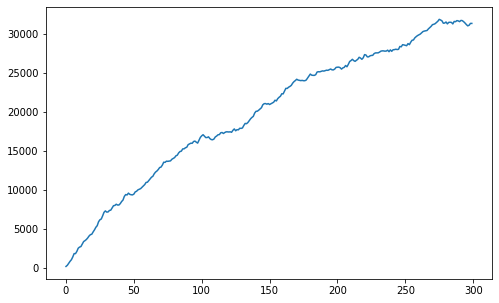

In [24]:
plt.figure(figsize=(8,5))
ucb_regret = clairvoyant_reward - ucb_rewards_iterations 
ucb_cumulative_regret = np.cumsum(ucb_regret, axis=1)
ucb_cum_reg_mean = np.mean(ucb_cumulative_regret, axis=0)

plt.plot(range(len(ucb_cum_reg_mean)), ucb_cum_reg_mean)
plt.show()

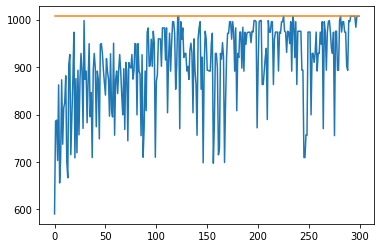

In [25]:
ucb_pulled_arms = ucb1_learner.get_all_pulled()
theoretical_rewards = [rew_per_arm[tuple(i)] for i in ucb_pulled_arms]

plt.plot([i for i in range(len(ucb_pulled_arms))], theoretical_rewards)
plt.plot([_ for _ in range(len(ucb_rewards))], [clairvoyant_reward for _ in range(len(ucb_rewards)) ])
plt.show()


TS

In [12]:
ts_rewards_iterations = []
for i in range(NUM_ITERATION):
    ts_learner = TSLearner(n_arms, n_products, environment.customers, graph_json, arms, environment.customers_distribution)
    print('\nIteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        ts_super_arm = ts_learner.select_superarm()
        print(ts_super_arm)
        report = environment.round(ts_super_arm)
        ts_learner.update(ts_super_arm.copy(), report)
    ts_rewards = ts_learner.history_rewards
    ts_rewards_iterations.append(np.array(ts_rewards))
ts_rewards_iterations = np.array(ts_rewards_iterations)
ts_rewards_iterations.shape


Iteration # 1
loading: [                              ] 0.0%[3, 2, 2, 1, 2]
[0, 1, 3, 2, 0]
[2, 0, 1, 2, 3]
[0, 3, 0, 1, 1]
[0, 0, 2, 3, 1]
[0, 2, 2, 0, 1]
[3, 2, 0, 3, 1]
[0, 0, 1, 0, 1]
[1, 2, 1, 0, 1]
[0, 2, 1, 3, 1]
loading: [===                           ] 10.0%[3, 2, 2, 3, 1]
[3, 2, 0, 2, 1]
[0, 2, 0, 0, 0]
[1, 2, 0, 3, 1]
[0, 2, 0, 3, 0]
[0, 2, 3, 0, 1]
[3, 2, 3, 1, 0]
[0, 2, 1, 3, 1]
[0, 2, 0, 1, 0]
[0, 2, 0, 0, 1]
loading: [======                        ] 20.0%[0, 2, 0, 1, 0]
[0, 2, 0, 0, 1]
[3, 2, 0, 2, 1]
[0, 2, 1, 0, 1]
[0, 2, 0, 3, 0]
[0, 2, 0, 2, 1]
[0, 2, 0, 2, 1]
[0, 2, 0, 2, 1]
[0, 2, 0, 0, 1]
[0, 2, 0, 2, 0]
loading: [=========                     ] 30.0%[0, 2, 0, 2, 1]
[3, 2, 0, 3, 0]
[0, 2, 0, 2, 1]
[0, 2, 0, 2, 1]
[3, 2, 0, 3, 1]
[0, 2, 0, 1, 1]
[0, 2, 0, 3, 2]
[0, 2, 0, 0, 1]
[0, 2, 1, 3, 1]
[3, 2, 0, 0, 0]
loading: [============                  ] 40.0%[0, 2, 0, 3, 0]
[0, 2, 0, 0, 0]
[0, 2, 0, 1, 1]
[0, 2, 0, 3, 0]
[0, 2, 0, 0, 1]
[0, 2, 0, 0, 0]
[0, 2, 0, 3, 3]

(1, 100)

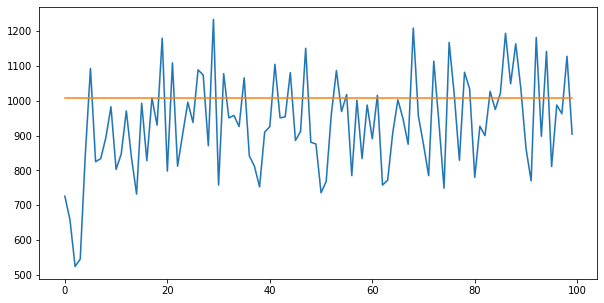

In [13]:
plt.figure(figsize=(10, 5))
mean = np.mean(ts_rewards_iterations, axis=0)
stdev = np.std(ts_rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(ts_rewards))], [clairvoyant_reward for _ in range(len(ts_rewards))])
plt.show()

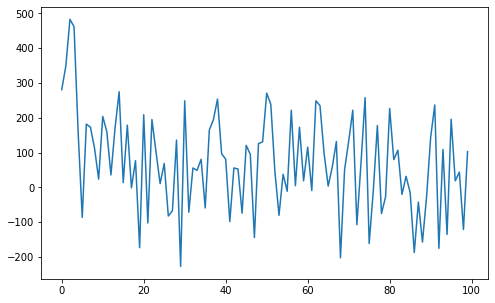

In [14]:
plt.figure(figsize=(8,5))
ts_regret = clairvoyant_reward - ts_rewards_iterations 
ts_mean_regret = np.mean(ts_regret, axis=0)

plt.plot(range(len(ts_mean_regret)), ts_mean_regret)
plt.show()

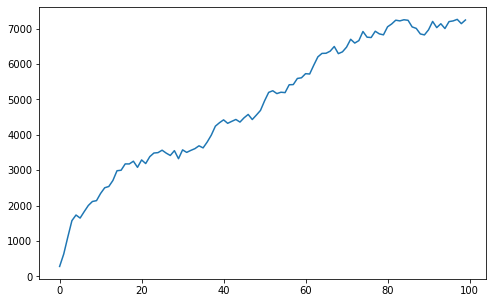

In [15]:
plt.figure(figsize=(8,5))
ts_regret = clairvoyant_reward - ts_rewards_iterations 
ts_cumulative_regret = np.cumsum(ts_regret, axis=1)
ts_cum_reg_mean = np.mean(ts_cumulative_regret, axis=0)

plt.plot(range(len(ts_cum_reg_mean)), ts_cum_reg_mean)
plt.show()

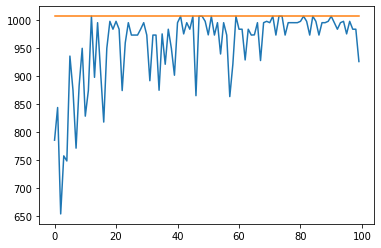

In [16]:
ts_pulled_arms = ts_learner.get_all_pulled()
theoretical_rewards = [rew_per_arm[tuple(i)] for i in ts_pulled_arms]

plt.plot([i for i in range(len(ts_pulled_arms))], theoretical_rewards)
plt.plot([_ for _ in range(len(ts_rewards))], [clairvoyant_reward for _ in range(len(ts_rewards)) ])
plt.show()


In [17]:
th_rews = list(rew_per_arm.values())
th_rews.sort()
delta_arms = th_rews[-1] - th_rews[-2]
print(delta_arms)
print(ts_learner.t)
seen = sum(sum(sum(ts_learner.beta_parameters)))
print(np.log(seen))
theoretical_regret = 1024 * np.log(seen)/delta_arms
theoretical_regret

9.092443024000204
100
9.589598387915172


1079.9901328284548